<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

All cells must be suitably commented / documented.

### Read Dataset

In [76]:
# Read data set
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns  
from matplotlib import pyplot as plt

data= pd.read_csv('cars.csv')
print(data)

     Buying Maintain  Doors Persons Lug_boot Safety  Class
0     vhigh    vhigh      2       2    small    low  unacc
1     vhigh    vhigh      2       2    small    med  unacc
2     vhigh    vhigh      2       2    small   high  unacc
3     vhigh    vhigh      2       2      med    low  unacc
4     vhigh    vhigh      2       2      med    med  unacc
...     ...      ...    ...     ...      ...    ...    ...
1723    low      low  5more    more      med    med   good
1724    low      low  5more    more      med   high  vgood
1725    low      low  5more    more      big    low  unacc
1726    low      low  5more    more      big    med   good
1727    low      low  5more    more      big   high  vgood

[1728 rows x 7 columns]


### Check for Missing Data

<AxesSubplot:>

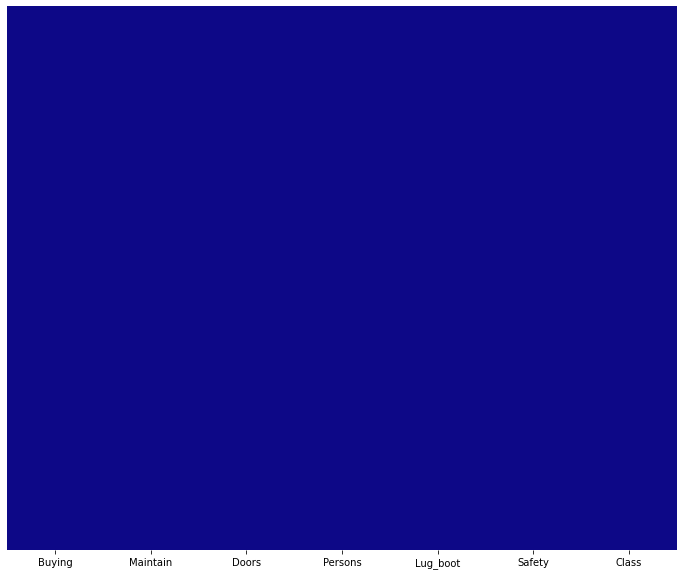

In [77]:
# checking for missing values
plt.figure(figsize=(12, 10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='plasma')   # creating heatmap for visual analysis

### Handle Categorical Values

In [78]:
data.head()    # for reference

,Buying,Maintain,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [79]:
data["Class"].unique()  # checking values of unique data in Class Column

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [80]:
data["Lug_boot"].unique()  # checking values of unique data in Lug boot Column

array(['small', 'med', 'big'], dtype=object)

In [81]:
data["Safety"].unique()  # checking values of unique data in Safety Column

array(['low', 'med', 'high'], dtype=object)

In [82]:
data["Maintain"].unique()  # checking values of unique data in Maintain Column

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [83]:
data["Buying"].unique()  # checking values of unique data in Buying Column

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [93]:
data['Doors'].unique()  # checking values of unique data in Doors Column

array([2, 3, 4, 5], dtype=int64)

In [94]:
data['Persons'].unique()  # checking values of unique data in Persons Column

array([2, 4, 5], dtype=int64)

In [84]:
# Information of dataset
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maintain  1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug_boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [95]:
# Replacing string value in integer to perform further operation
data['Buying'] = data['Buying'].replace(['vhigh','high','med','low'],[4,3,2,1])
data['Maintain'] = data['Maintain'].replace(['vhigh','high','med','low'],[4,3,2,1])
data['Doors'] = data['Doors'].replace(['2','3','4','5more'],[2,3,4,5])
data['Persons'] = data['Persons'].replace(['2','4','more'],[2,4,5])
data['Lug_boot'] = data['Lug_boot'].replace(['small','med','big'],[1,2,3])
data['Safety'] = data['Safety'].replace(['med','high','low'],[1,2,3])
data['Class'] = data['Class'].replace(['unacc','acc','vgood','good'],[1,2,3,4])

In [96]:
data.head()

,Buying,Maintain,Doors,Persons,Lug_boot,Safety,Class
0,4,4,2,2,1,3,1
1,4,4,2,2,1,1,1
2,4,4,2,2,1,2,1
3,4,4,2,2,2,3,1
4,4,4,2,2,2,1,1


## Spliting Data for Training and Testing

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class',axis=1),data['Class'], test_size=0.40, 
                                                    random_state=101)

### Apply different Classification Algorithms and tune them

### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
logmodel = LogisticRegression(max_iter=800)
#logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=800)

In [101]:
predictions = logmodel.predict(X_test)

### KNN

In [102]:
from sklearn.cluster import KMeans

In [109]:
km = KMeans(n_clusters = 4, n_jobs = 4, random_state=101)
km.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=4, random_state=101)

In [110]:
clusters=km.labels_
clusters

array([1, 0, 3, ..., 2, 1, 3])

In [111]:
y_pred_knn = km.predict(X_test)

### Suport Vector Machine

In [112]:
from sklearn.svm import SVC
svc = SVC()

In [113]:
svc.fit(X_train,y_train)

SVC()

In [114]:
y_pred_svc = svc.predict(X_test)

### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
dst = DecisionTreeClassifier(max_depth = 50, random_state = 0,criterion = 'entropy')

In [116]:
dst.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=0)

In [117]:
y_pred_dst = dst.predict(X_test)

### Get performance metrics for all the applied classifiers

### For Logistic Regression 

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = []

In [139]:
cnf_matrix=confusion_matrix(y_test,predictions)
cnf_matrix

array([[441,  42,   4,   2],
       [ 66,  75,   0,   9],
       [  7,  11,   4,   1],
       [  3,  12,   3,  12]], dtype=int64)

<AxesSubplot:>

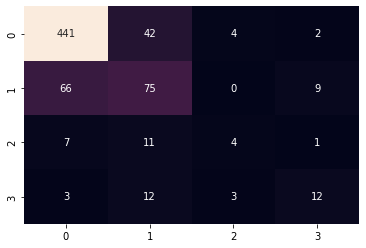

In [140]:
# creating heatmap for confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=False)

In [141]:
# printing classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.85      0.90      0.88       489
           2       0.54      0.50      0.52       150
           3       0.36      0.17      0.24        23
           4       0.50      0.40      0.44        30

    accuracy                           0.77       692
   macro avg       0.56      0.49      0.52       692
weighted avg       0.75      0.77      0.76       692



In [144]:
accuracy.append(accuracy_score(y_test,predictions))

### For KNN

In [145]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[  0,   0,   0,   0,   0],
       [106, 235,  57,  91,   0],
       [ 55,   0,  50,  45,   0],
       [  8,   0,  15,   0,   0],
       [ 10,   0,  20,   0,   0]], dtype=int64)

In [146]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65       489
           2       0.35      0.33      0.34       150
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        30

    accuracy                           0.41       692
   macro avg       0.27      0.16      0.20       692
weighted avg       0.78      0.41      0.53       692



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\

In [147]:
accuracy.append(accuracy_score(y_test,y_pred_knn))

### For SVM

In [148]:
cm_svc = confusion_matrix(y_test,y_pred_svc)
cm_svc

array([[458,  30,   0,   1],
       [ 11, 133,   0,   6],
       [  0,   5,  18,   0],
       [  0,  11,   2,  17]], dtype=int64)

In [149]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       0.98      0.94      0.96       489
           2       0.74      0.89      0.81       150
           3       0.90      0.78      0.84        23
           4       0.71      0.57      0.63        30

    accuracy                           0.90       692
   macro avg       0.83      0.79      0.81       692
weighted avg       0.91      0.90      0.91       692



In [150]:
accuracy.append(accuracy_score(y_test,y_pred_svc))

### For Decision Tree

In [151]:
cm_dst = confusion_matrix(y_test,y_pred_dst)
cm_dst

array([[475,  11,   0,   3],
       [  7, 140,   0,   3],
       [  0,   2,  20,   1],
       [  0,   2,   0,  28]], dtype=int64)

In [152]:
print(classification_report(y_test,y_pred_dst))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       489
           2       0.90      0.93      0.92       150
           3       1.00      0.87      0.93        23
           4       0.80      0.93      0.86        30

    accuracy                           0.96       692
   macro avg       0.92      0.93      0.92       692
weighted avg       0.96      0.96      0.96       692



In [153]:
accuracy.append(accuracy_score(y_test,y_pred_dst))

### Visually compare the performance of all classifiers

In [154]:
ML_Algo = ['Logistic Regression','KNN','SVM','Decision Tree']
df = pd.DataFrame(list(zip(ML_Algo, accuracy)),columns =['Algorithm_Name', 'Score'])      

In [155]:
vrep = sns.light_palette("green", as_cmap = True)
s = data.style.background_gradient(cmap = vrep)
s

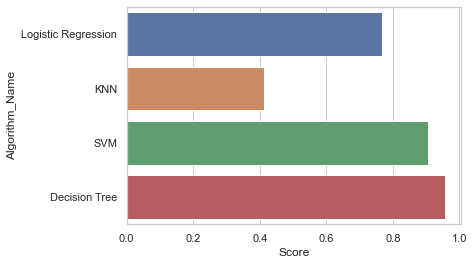

In [156]:
sns.set(style = "whitegrid")
ax = sns.barplot(y = "Algorithm_Name",x = "Score",data = df)